# Survey Project
### Imports needed

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
sns.set_style('whitegrid')
%matplotlib inline

# Exploratory Data Analysis

In [122]:
df = pd.read_excel(r'ASResults24.xlsx', engine='openpyxl', skiprows=[1])

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22559 entries, 0 to 22558
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   22559 non-null  datetime64[ns]
 1   Q2      22081 non-null  object        
 2   Q3      21933 non-null  object        
 3   Q4      2252 non-null   object        
 4   Q5      4054 non-null   object        
 5   Q9      19678 non-null  object        
 6   Q10     1611 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 1.2+ MB


In [124]:
df.head()

,Month,Q2,Q3,Q4,Q5,Q9,Q10
0,2024-01-01,Cebu,Somewhat satisfied,NaN,NaN,Somewhat satisfied,NaN
1,2024-01-01,Bacolod,Extremely satisfied,NaN,NaN,Extremely satisfied,NaN
2,2024-01-01,Cebu,Neither satisfied nor unsatisfied,NaN,none,Neither satisfied nor unsatisfied,NaN
3,2024-01-01,Bacolod,Extremely satisfied,NaN,NaN,Somewhat satisfied,NaN
4,2024-01-01,Bacolod,Extremely satisfied,NaN,NaN,Extremely satisfied,NaN


### Number of people by call center:

In [125]:
df['Q2'].value_counts()

Q2
Cebu            7636
Bacolod         7038
Dumaguete       4090
Guatemala       3016
Barranquilla     301
Name: count, dtype: int64

### How many people answered the survey?

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22559 entries, 0 to 22558
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   22559 non-null  datetime64[ns]
 1   Q2      22081 non-null  object        
 2   Q3      21933 non-null  object        
 3   Q4      2252 non-null   object        
 4   Q5      4054 non-null   object        
 5   Q9      19678 non-null  object        
 6   Q10     1611 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 1.2+ MB


### How many of them were completely satisfied with the experience? From what companies?

In [127]:
Excelents = df[df['Q3']=='Extremely satisfied'].groupby('Q2').count()
Excelents = Excelents.reset_index()
Excelents.index += 1
Excelents.rename(columns={'Q2':'Company'})

,Company,Month,Q3,Q4,Q5,Q9,Q10
1,Bacolod,2425,2425,0,0,2423,26
2,Barranquilla,55,55,0,0,54,1
3,Cebu,1888,1888,0,0,1886,45
4,Dumaguete,1200,1200,0,0,1200,44
5,Guatemala,818,818,0,0,816,25


In [128]:
print(Excelents)

             Q2  Month    Q3  Q4  Q5    Q9  Q10
1       Bacolod   2425  2425   0   0  2423   26
2  Barranquilla     55    55   0   0    54    1
3          Cebu   1888  1888   0   0  1886   45
4     Dumaguete   1200  1200   0   0  1200   44
5     Guatemala    818   818   0   0   816   25


### How many of them were completely unsatisfied with the experience? From what companies?

In [129]:
BadUnsatisfied = df[df['Q3']=='Extremely unsatisfied'].groupby('Q2').count()
BadUnsatisfied = BadUnsatisfied.reset_index()
BadUnsatisfied.index += 1
BadUnsatisfied.rename(columns={'Q2':'Company'})

,Company,Month,Q3,Q4,Q5,Q9,Q10
1,Bacolod,215,215,209,157,31,14
2,Barranquilla,31,31,30,25,0,0
3,Cebu,334,334,328,282,17,12
4,Dumaguete,97,97,92,80,4,0
5,Guatemala,117,117,112,101,8,5


In [130]:
print(BadUnsatisfied)

             Q2  Month   Q3   Q4   Q5  Q9  Q10
1       Bacolod    215  215  209  157  31   14
2  Barranquilla     31   31   30   25   0    0
3          Cebu    334  334  328  282  17   12
4     Dumaguete     97   97   92   80   4    0
5     Guatemala    117  117  112  101   8    5


### What is the general answer for the Q3 and the popular opinion about working in a call center?

In [131]:
answersQ3 = df['Q3']

In [132]:
answersQ3.value_counts()

Q3
Somewhat satisfied                   10406
Extremely satisfied                   6386
Neither satisfied nor unsatisfied     2843
Somewhat unsatisfied                  1504
Extremely unsatisfied                  794
Name: count, dtype: int64

### Which topics (By Definition) are the most frequent for an ex employee recommending to improve?

In [133]:
answersQ4 = df['Q4']

In [134]:
answersQ4.value_counts().head(5)

Q4
Internal - Compensation        340
Internal - Management          260
Internal - Benefits            248
NONE                           138
Internal - Work Environment    120
Name: count, dtype: int64

### What kind of correlation has the IT support satisfaction with the work experience satisfaction?

In [135]:
df.columns

Index(['Month', 'Q2', 'Q3', 'Q4', 'Q5', 'Q9', 'Q10'], dtype='object')

In [136]:
DFr = pd.DataFrame(df['Q3'].value_counts()).reset_index().rename(columns={'count': 'Count Q3', 'Q3':'Satisfaction'})

In [137]:
DFr

,Satisfaction,Count Q3
0,Somewhat satisfied,10406
1,Extremely satisfied,6386
2,Neither satisfied nor unsatisfied,2843
3,Somewhat unsatisfied,1504
4,Extremely unsatisfied,794


In [199]:
DFQ9 = pd.DataFrame(df['Q9'].value_counts()).reset_index().rename(columns={'count': 'Count Q9', 'Q9':'Satisfaction'})

In [200]:
DFQ9

,Satisfaction,Count Q9
0,Somewhat satisfied,8959
1,Extremely satisfied,5125
2,Neither satisfied nor unsatisfied,3803
3,Somewhat unsatisfied,1087
4,Extremely unsatisfied,704


In [201]:
result = pd.concat([DFr,DFQ9['Count Q9']], join='inner',axis=1)

In [202]:
display(result)

,Satisfaction,Count Q3,Count Q9
0,Somewhat satisfied,10406,8959
1,Extremely satisfied,6386,5125
2,Neither satisfied nor unsatisfied,2843,3803
3,Somewhat unsatisfied,1504,1087
4,Extremely unsatisfied,794,704


In [203]:
sns.pairplot(result)

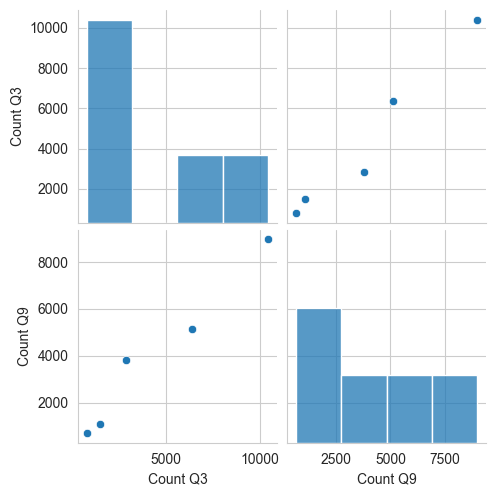

In [204]:
plt.show()

In [205]:
result = result.set_index('Satisfaction')

In [206]:
result.corr()

,Count Q3,Count Q9
Count Q3,1.000000,0.979789
Count Q9,0.979789,1.000000


In [212]:
sns.lmplot(data=result, x='Count Q9',y='Count Q3')

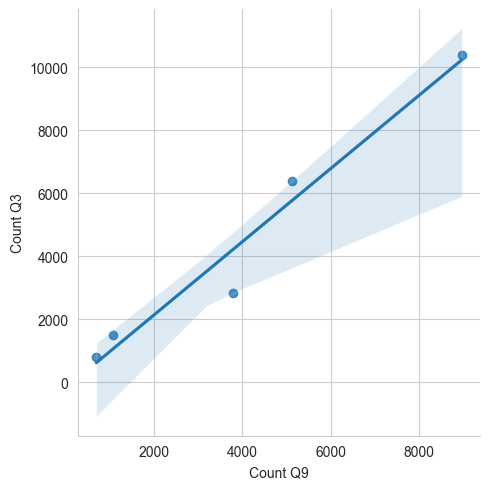

In [213]:
plt.show()

In [214]:
result

,Count Q3,Count Q9
Satisfaction,,
Somewhat satisfied,10406,8959
Extremely satisfied,6386,5125
Neither satisfied nor unsatisfied,2843,3803
Somewhat unsatisfied,1504,1087
Extremely unsatisfied,794,704


In [339]:
result.corr()

,Count Q3,Count Q9
Count Q3,1.000000,0.979789
Count Q9,0.979789,1.000000
